In [1]:
import os
from astropy.io import fits
import codecs
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
import matplotlib.ticker as ticker
from astropy.wcs import WCS
from photutils.psf.matching import resize_psf
from photutils.psf import create_matching_kernel
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans, convolve
from photutils.psf import (HanningWindow, TukeyWindow, CosineBellWindow,
                           SplitCosineBellWindow, TopHatWindow)
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy.signal import fftconvolve

psf814 = fits.open('f814w_psf_69p_60mas.fits')[0].data
psf125 = fits.open('f125w_psf_69p_60mas.fits')[0].data
psf160 = fits.open('f160w_psf_69p_60mas.fits')[0].data

Text(0.5, 0.98, 'TopHat(0.35)')

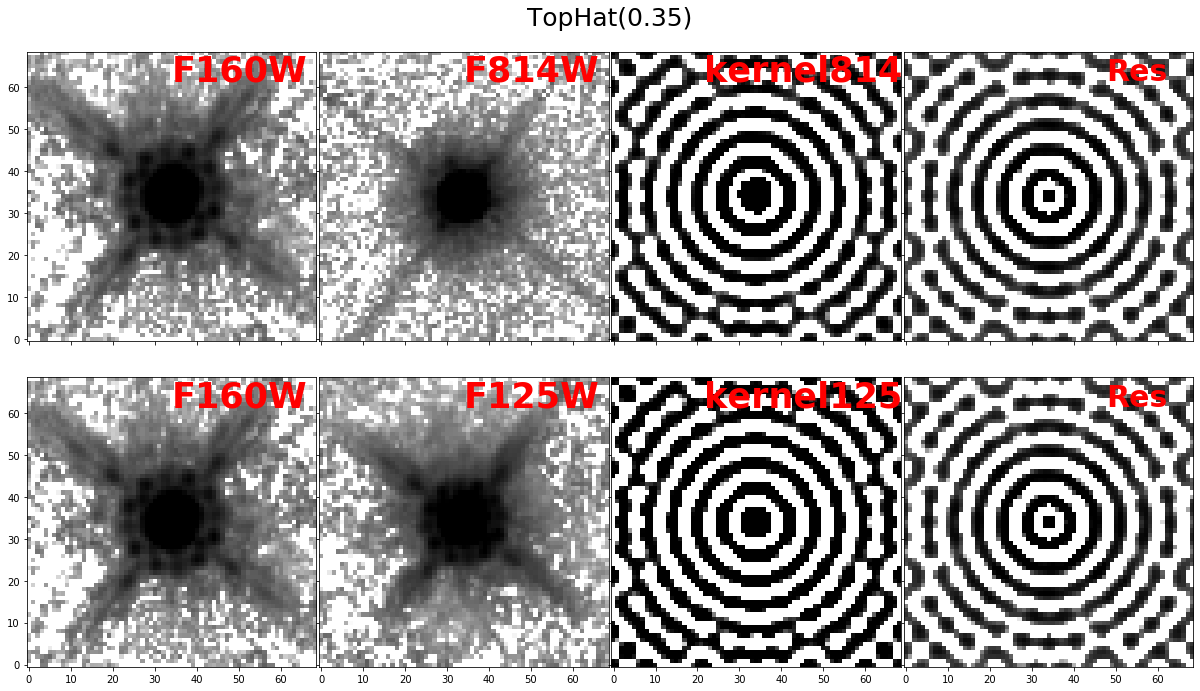

In [2]:
alpha = 0.35
window = TopHatWindow(alpha)
kernel814 = create_matching_kernel(psf814, psf160, window=window)
kernel125 = create_matching_kernel(psf125, psf160, window=window)
psf814m = fftconvolve(psf814,kernel814,mode='same')
psf125m = fftconvolve(psf125,kernel125,mode='same')

norm = ImageNormalize(stretch=LogStretch())
fig1,axes=plt.subplots(figsize=(18,10), nrows=2,ncols=4, sharex=True, sharey =True)    
plt.subplots_adjust(top=0.94,bottom=0.04,left=0.05,right=0.95,hspace=0.01, wspace=0.01) 

axes[0][0].imshow(psf160, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][1].imshow(psf814, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][2].imshow(kernel814, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][3].imshow(psf160-psf814m, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)

axes[1][0].imshow(psf160, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][1].imshow(psf125, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][2].imshow(kernel125, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][3].imshow(psf160-psf125m, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)


axes[0][0].text(0.5,0.9,'F160W', fontsize = 35, transform = axes[0][0].transAxes, fontweight='bold',color ='red') 
axes[0][1].text(0.5,0.9, 'F814W', fontsize = 35, transform = axes[0][1].transAxes, fontweight='bold',color ='red') 
axes[0][2].text(0.32,0.9,'kernel814', fontsize = 35, transform = axes[0][2].transAxes, fontweight='bold',color ='red') 
axes[0][3].text(0.7,0.9,'Res', fontsize = 30, transform = axes[0][3].transAxes, fontweight='bold',color ='red') 
axes[1][0].text(0.5,0.9,'F160W', fontsize = 35, transform = axes[1][0].transAxes, fontweight='bold',color ='red') 
axes[1][1].text(0.5,0.9, 'F125W', fontsize = 35, transform = axes[1][1].transAxes, fontweight='bold',color ='red') 
axes[1][2].text(0.32,0.9,'kernel125', fontsize = 35, transform = axes[1][2].transAxes, fontweight='bold',color ='red') 
axes[1][3].text(0.7,0.9,'Res', fontsize = 30, transform = axes[1][3].transAxes, fontweight='bold',color ='red') 

plt.suptitle('TopHat('+str(alpha)+')', fontsize=25)

Text(0.5, 0.98, 'TopHat(1)')

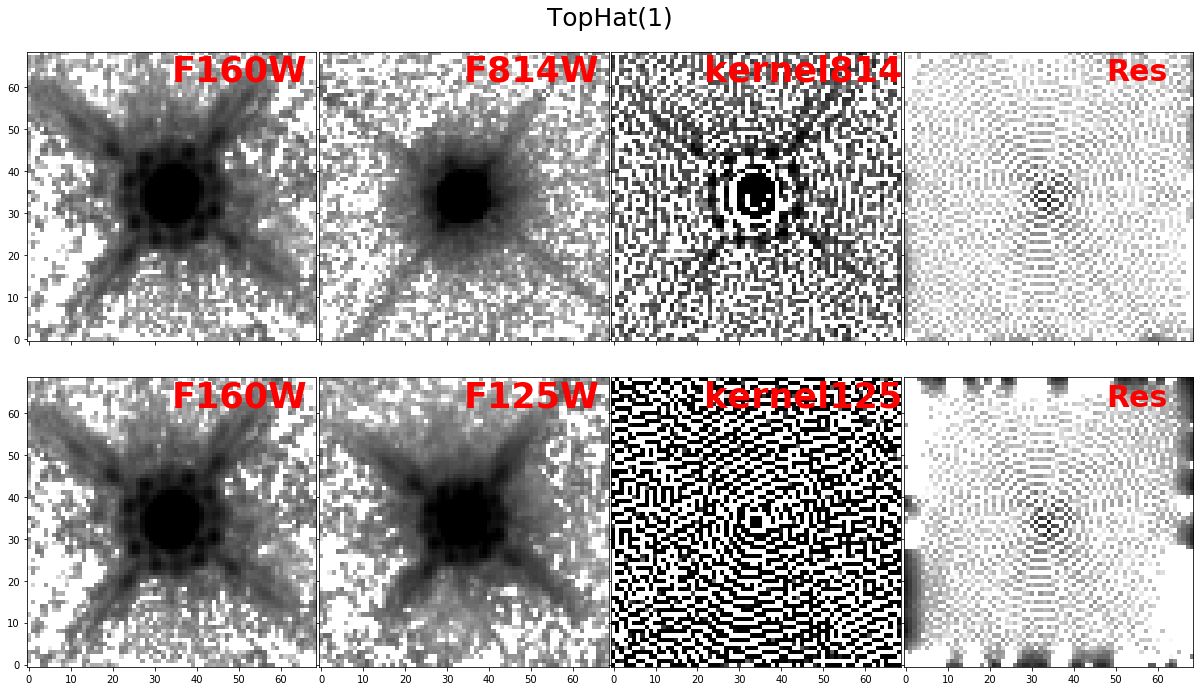

In [3]:
alpha = 1
window = TopHatWindow(alpha)
kernel814 = create_matching_kernel(psf814, psf160, window=window)
kernel125 = create_matching_kernel(psf125, psf160, window=window)
psf814m = fftconvolve(psf814,kernel814,mode='same')
psf125m = fftconvolve(psf125,kernel125,mode='same')

norm = ImageNormalize(stretch=LogStretch())
fig1,axes=plt.subplots(figsize=(18,10), nrows=2,ncols=4, sharex=True, sharey =True)    
plt.subplots_adjust(top=0.94,bottom=0.04,left=0.05,right=0.95,hspace=0.01, wspace=0.01) 

axes[0][0].imshow(psf160, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][1].imshow(psf814, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][2].imshow(kernel814, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][3].imshow(psf160-psf814m, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)

axes[1][0].imshow(psf160, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][1].imshow(psf125, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][2].imshow(kernel125, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][3].imshow(psf160-psf125m, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)


axes[0][0].text(0.5,0.9,'F160W', fontsize = 35, transform = axes[0][0].transAxes, fontweight='bold',color ='red') 
axes[0][1].text(0.5,0.9, 'F814W', fontsize = 35, transform = axes[0][1].transAxes, fontweight='bold',color ='red') 
axes[0][2].text(0.32,0.9,'kernel814', fontsize = 35, transform = axes[0][2].transAxes, fontweight='bold',color ='red') 
axes[0][3].text(0.7,0.9,'Res', fontsize = 30, transform = axes[0][3].transAxes, fontweight='bold',color ='red') 
axes[1][0].text(0.5,0.9,'F160W', fontsize = 35, transform = axes[1][0].transAxes, fontweight='bold',color ='red') 
axes[1][1].text(0.5,0.9, 'F125W', fontsize = 35, transform = axes[1][1].transAxes, fontweight='bold',color ='red') 
axes[1][2].text(0.32,0.9,'kernel125', fontsize = 35, transform = axes[1][2].transAxes, fontweight='bold',color ='red') 
axes[1][3].text(0.7,0.9,'Res', fontsize = 30, transform = axes[1][3].transAxes, fontweight='bold',color ='red') 

plt.suptitle('TopHat('+str(alpha)+')', fontsize=25)

Text(0.5, 0.98, 'TopHat(1.6)')

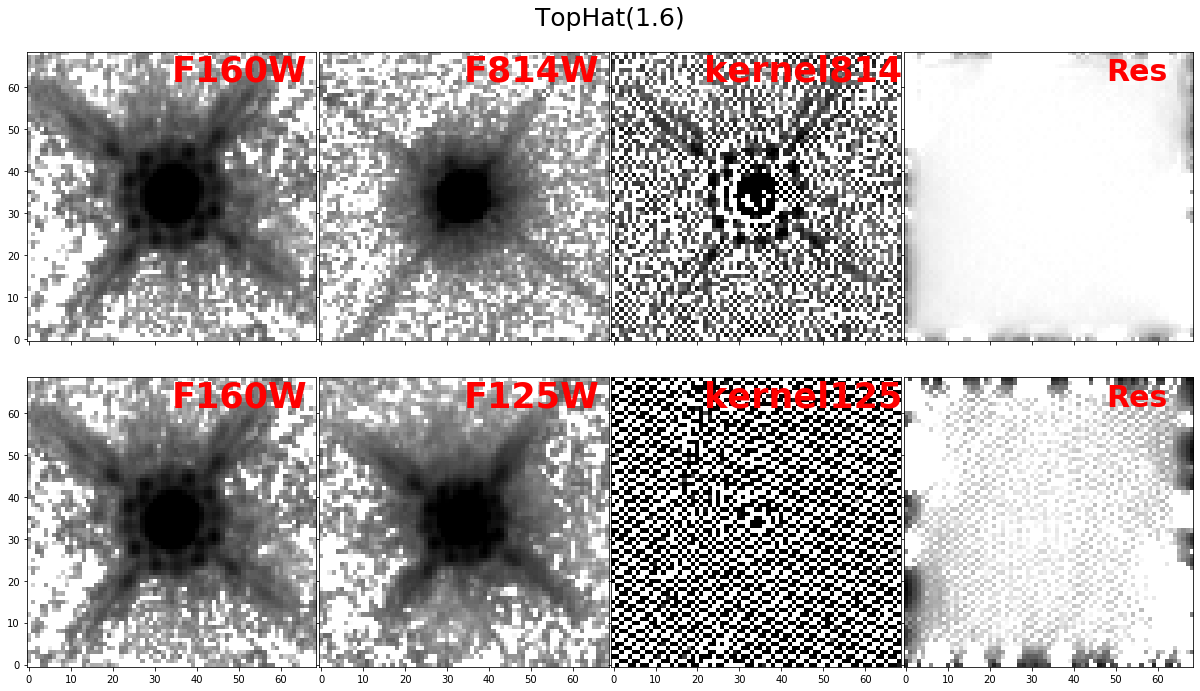

In [4]:
alpha = 1.6
window = TopHatWindow(alpha)
kernel814 = create_matching_kernel(psf814, psf160, window=window)
kernel125 = create_matching_kernel(psf125, psf160, window=window)
psf814m = fftconvolve(psf814,kernel814,mode='same')
psf125m = fftconvolve(psf125,kernel125,mode='same')

norm = ImageNormalize(stretch=LogStretch())
fig1,axes=plt.subplots(figsize=(18,10), nrows=2,ncols=4, sharex=True, sharey =True)    
plt.subplots_adjust(top=0.94,bottom=0.04,left=0.05,right=0.95,hspace=0.01, wspace=0.01) 

axes[0][0].imshow(psf160, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][1].imshow(psf814, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][2].imshow(kernel814, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[0][3].imshow(psf160-psf814m, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)

axes[1][0].imshow(psf160, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][1].imshow(psf125, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][2].imshow(kernel125, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)
axes[1][3].imshow(psf160-psf125m, cmap='gray_r', origin='lower', norm =norm, vmax=0.0004,vmin=0.0)


axes[0][0].text(0.5,0.9,'F160W', fontsize = 35, transform = axes[0][0].transAxes, fontweight='bold',color ='red') 
axes[0][1].text(0.5,0.9, 'F814W', fontsize = 35, transform = axes[0][1].transAxes, fontweight='bold',color ='red') 
axes[0][2].text(0.32,0.9,'kernel814', fontsize = 35, transform = axes[0][2].transAxes, fontweight='bold',color ='red') 
axes[0][3].text(0.7,0.9,'Res', fontsize = 30, transform = axes[0][3].transAxes, fontweight='bold',color ='red') 
axes[1][0].text(0.5,0.9,'F160W', fontsize = 35, transform = axes[1][0].transAxes, fontweight='bold',color ='red') 
axes[1][1].text(0.5,0.9, 'F125W', fontsize = 35, transform = axes[1][1].transAxes, fontweight='bold',color ='red') 
axes[1][2].text(0.32,0.9,'kernel125', fontsize = 35, transform = axes[1][2].transAxes, fontweight='bold',color ='red') 
axes[1][3].text(0.7,0.9,'Res', fontsize = 30, transform = axes[1][3].transAxes, fontweight='bold',color ='red') 

plt.suptitle('TopHat('+str(alpha)+')', fontsize=25)